In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the csv file......
df=pd.read_csv('hour.csv')
df.drop(['instant'],axis=True,inplace=True)
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
# Creating a DataFrame....
df_fin=pd.DataFrame(df)
df_fin

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### By studying the details provided on uci website it is inferred that:
1) Features/Attributes:                                                                                                         
   > dteday : date                                                                  
   > season : season (1:winter, 2:spring, 3:summer, 4:fall)                                                                 
   > yr : year (0: 2011, 1:2012)                                               
   > mnth : month ( 1 to 12)                                                                   
   > hr : hour (0 to 23)                                                                                
   > holiday : weather day is holiday or not.                                               
   > weekday : day of the week.                                                                            
   > workingday : if day is neither weekend nor holiday is 1, otherwise is 0.                                                  
   > weathersit :                                                          
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                                    
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                                 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds                               
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                               
   > temp : Normalized temperature in Celsius.                                     
   > atemp: Normalized feeling temperature in Celsius.                                                  
   > hum: Normalized humidity.                                                                          
   > windspeed: Normalized wind speed.                                                               
   > casual: count of casual users.                                       
   > registered: count of registered users.                                        

2) Labels/Target:                                   
   > cnt: count of total rental bikes including both casual and registered.  

3) we have to predict the total count of bikes hired(took on rent) so that it will be helpful in correlating with other events.       
4) As it is continuous data  so i will use Linear Regression here.                                            
 

# EDA ANALYSIS

In [4]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 17379 rows and 16 columns.
df.shape

(17379, 16)

In [5]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
# Printed the last 10 rows of the dataset
df.tail(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17369,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17370,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17371,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17372,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
17373,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [7]:
# Statistical Features Information
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Information:
1) All the fields are not normally distributed but are very close to it.                                              
2) In some features outliers are present.                                                  

In [8]:
# checking the Features information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


According to the information collected:                                           
1) No null Data                                        
2) Object Type= 1                                       
3) Float Type= 4                                       
4) Int Type= 11                                 

In [9]:
# Checking the unique values
for col in df.columns.values:
    print("Number of unique values of{} :{} ".format(col,df[col].nunique()))

Number of unique values ofdteday :731 
Number of unique values ofseason :4 
Number of unique values ofyr :2 
Number of unique values ofmnth :12 
Number of unique values ofhr :24 
Number of unique values ofholiday :2 
Number of unique values ofweekday :7 
Number of unique values ofworkingday :2 
Number of unique values ofweathersit :4 
Number of unique values oftemp :50 
Number of unique values ofatemp :65 
Number of unique values ofhum :89 
Number of unique values ofwindspeed :30 
Number of unique values ofcasual :322 
Number of unique values ofregistered :776 
Number of unique values ofcnt :869 


In [10]:
# checking the Data types.
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Univariate Plots Analysis

season           AxesSubplot(0.125,0.799681;0.352273x0.0803191)
yr            AxesSubplot(0.547727,0.799681;0.352273x0.0803191)
mnth             AxesSubplot(0.125,0.703298;0.352273x0.0803191)
hr            AxesSubplot(0.547727,0.703298;0.352273x0.0803191)
holiday          AxesSubplot(0.125,0.606915;0.352273x0.0803191)
weekday       AxesSubplot(0.547727,0.606915;0.352273x0.0803191)
workingday       AxesSubplot(0.125,0.510532;0.352273x0.0803191)
weathersit    AxesSubplot(0.547727,0.510532;0.352273x0.0803191)
temp             AxesSubplot(0.125,0.414149;0.352273x0.0803191)
atemp         AxesSubplot(0.547727,0.414149;0.352273x0.0803191)
hum              AxesSubplot(0.125,0.317766;0.352273x0.0803191)
windspeed     AxesSubplot(0.547727,0.317766;0.352273x0.0803191)
casual           AxesSubplot(0.125,0.221383;0.352273x0.0803191)
registered    AxesSubplot(0.547727,0.221383;0.352273x0.0803191)
cnt                 AxesSubplot(0.125,0.125;0.352273x0.0803191)
dtype: object

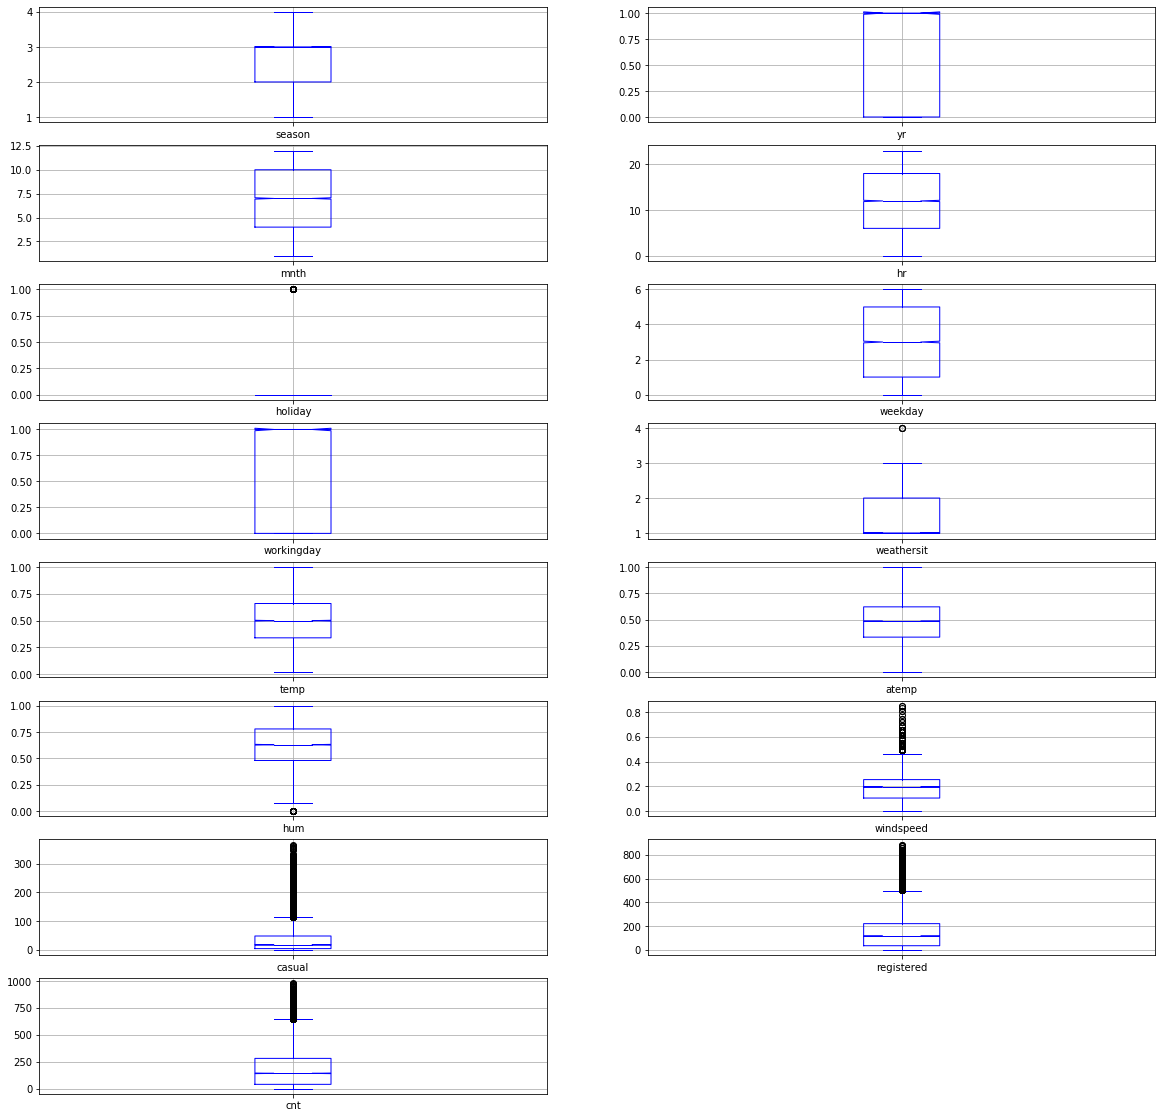

In [11]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(8,2),figsize=(20,20),grid=True,notch=True,color='blue' ,legend=True)

##### As we can see lots of outliers present in windspeed,casual,registered, and cnt.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002805921FE48>,
      dtype=object)

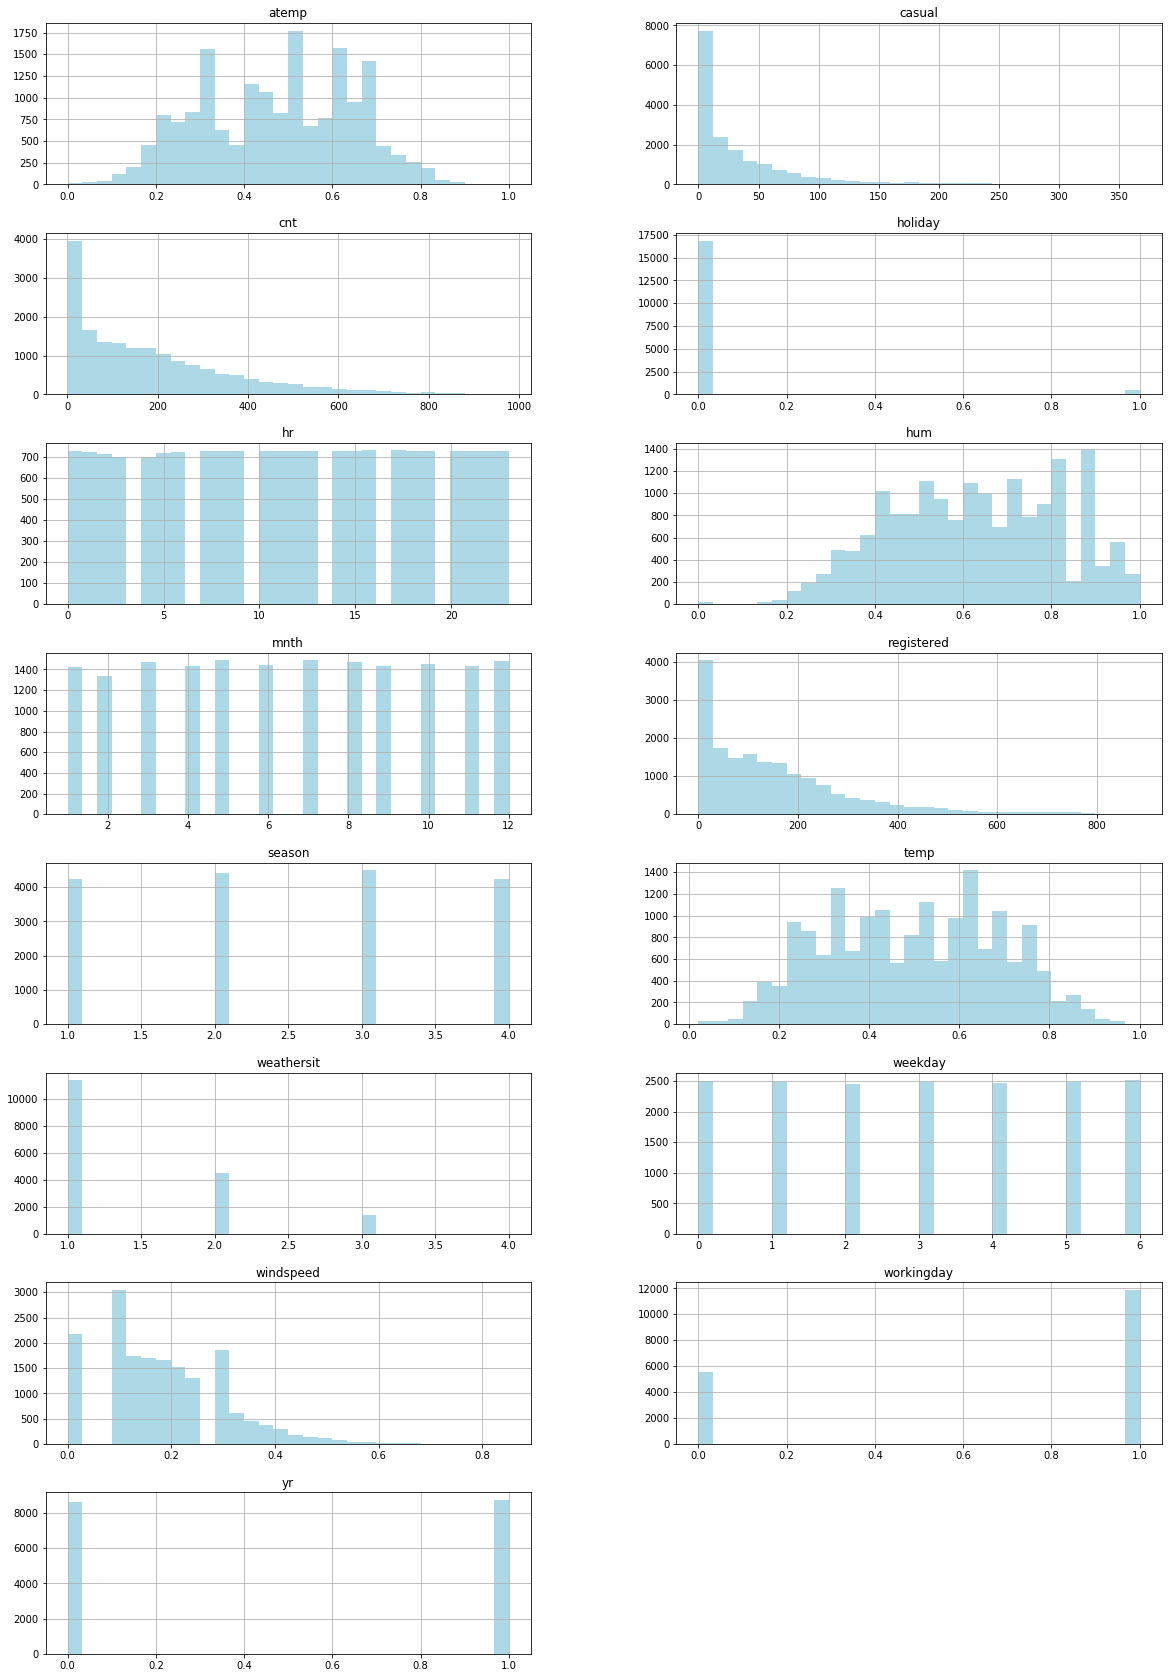

In [12]:
#Checking the Distribution using the histogram plot.
df.hist(figsize=(20,30),grid=True,layout=(8,2),bins=30,color='lightblue')

##### From Histogram it is inferred that Some Features are left skewed.

## Multivariate Plots Analysis:

In [13]:
# Date when no. of bike Sharing is maximum
# converting data type date of dteday from object to datetime64.

df_fin['dteday']= pd.to_datetime(df_fin['dteday'])
df_fin['Date']=df_fin['dteday'].dt.day
df_fin.drop_duplicates(['dteday'],inplace=True)
df_fin


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
24,2011-01-02,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985,4,13,17,2
47,2011-01-03,1,0,1,0,0,1,1,1,0.22,0.1970,0.44,0.3582,0,5,5,3
69,2011-01-04,1,0,1,0,0,2,1,1,0.16,0.1818,0.55,0.1045,0,5,5,4
92,2011-01-05,1,0,1,0,0,3,1,1,0.20,0.2576,0.64,0.0000,0,6,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17259,2012-12-27,1,1,12,0,0,4,1,3,0.26,0.2273,0.87,0.2985,0,3,3,27
17283,2012-12-28,1,1,12,0,0,5,1,2,0.24,0.2424,0.60,0.1642,3,22,25,28
17307,2012-12-29,1,1,12,0,0,6,0,2,0.24,0.2424,0.70,0.0000,1,25,26,29
17331,2012-12-30,1,1,12,0,0,0,0,2,0.26,0.2576,0.60,0.1642,0,41,41,30


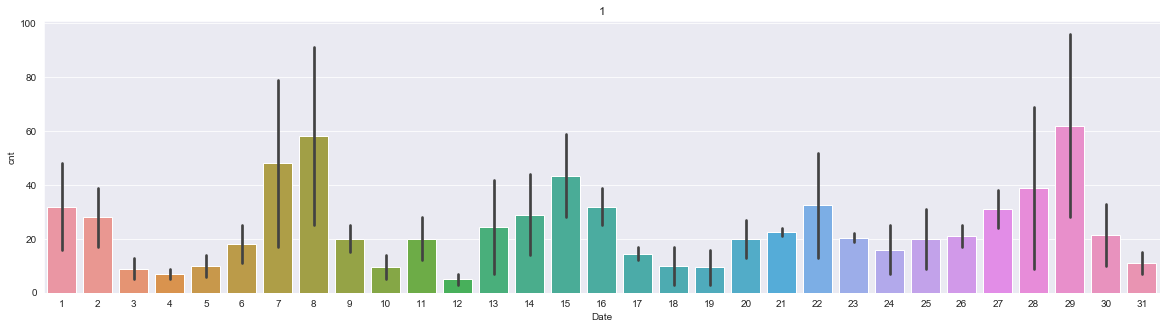

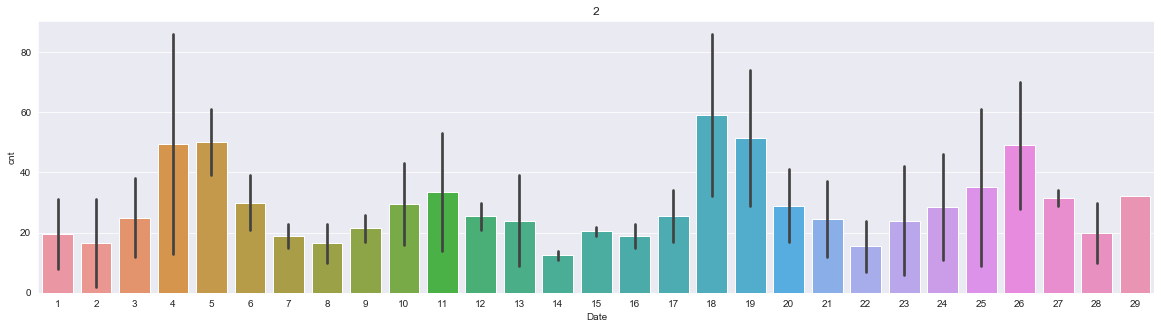

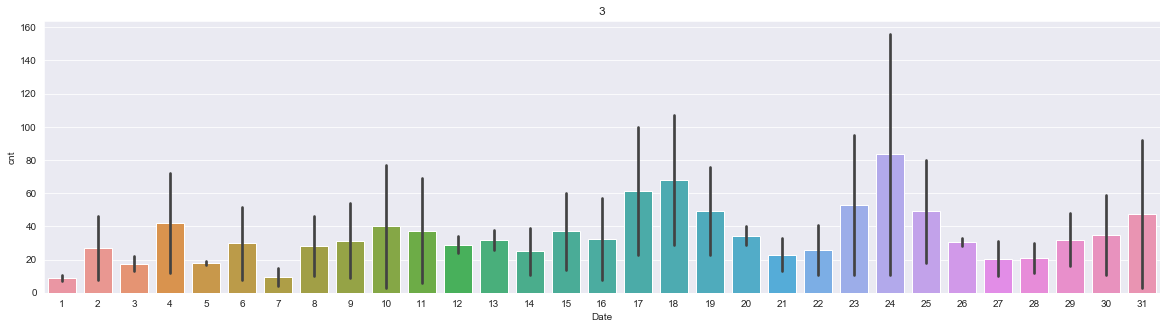

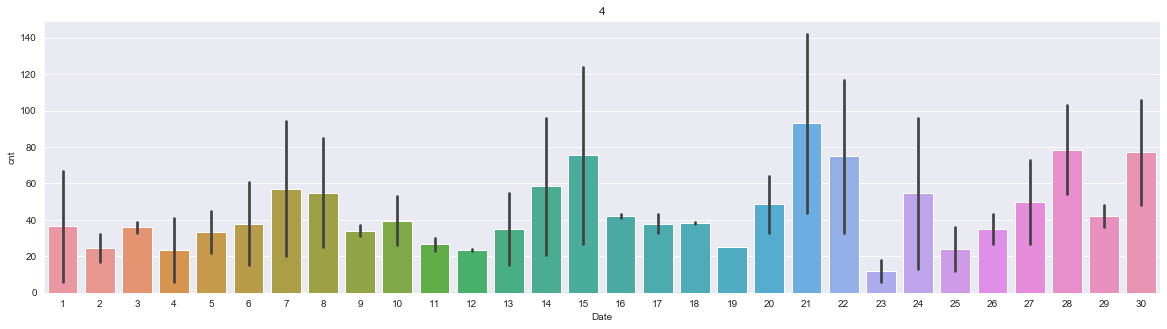

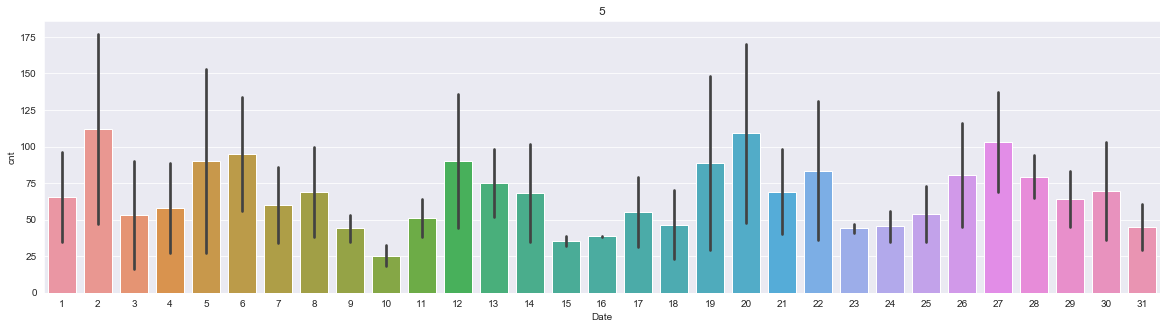

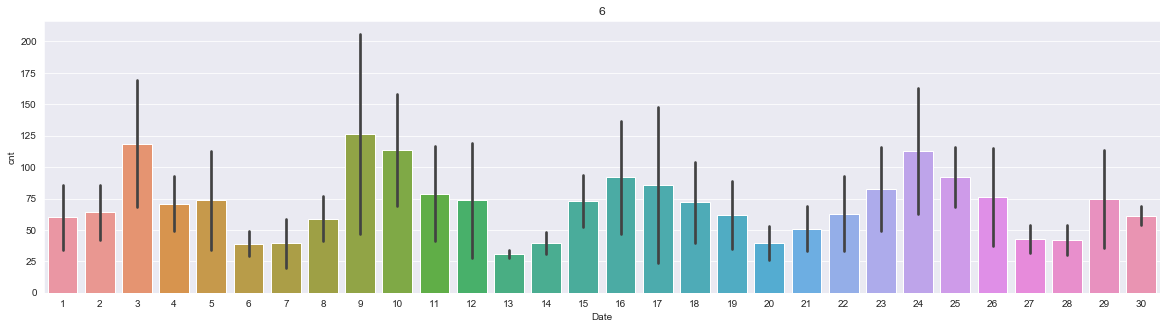

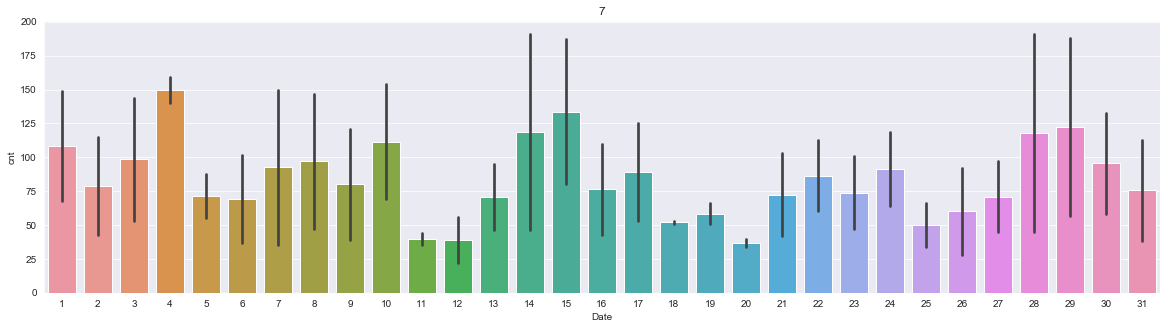

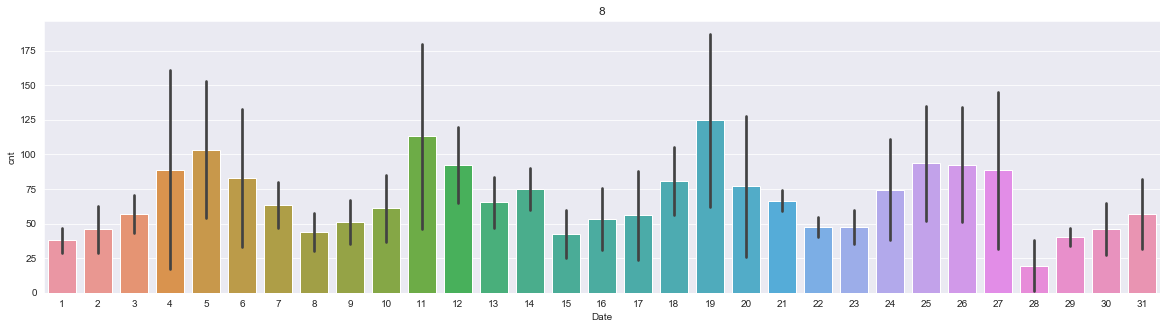

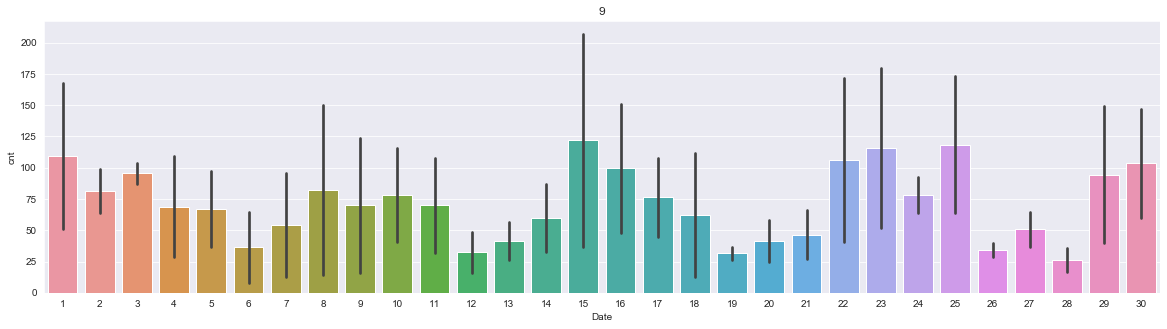

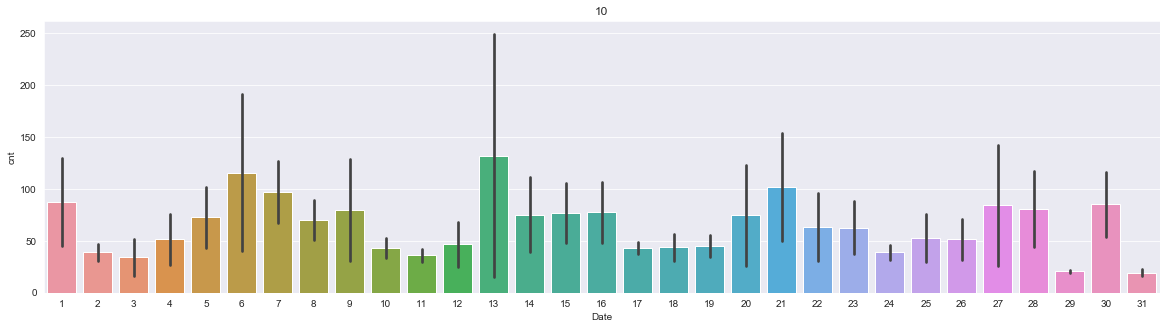

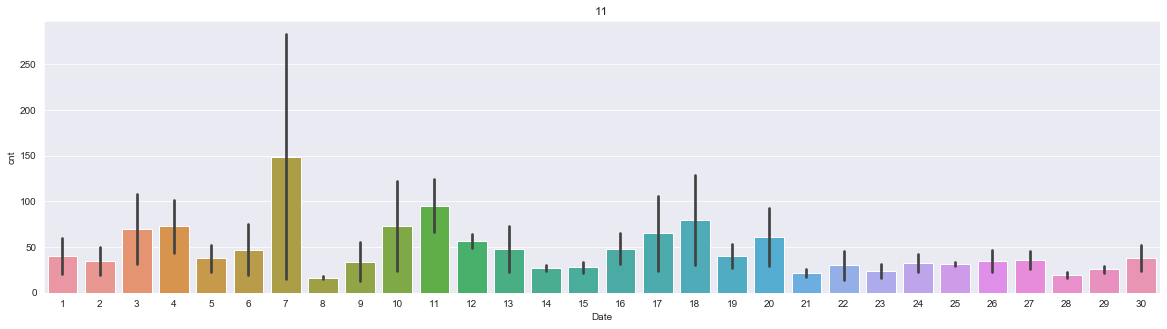

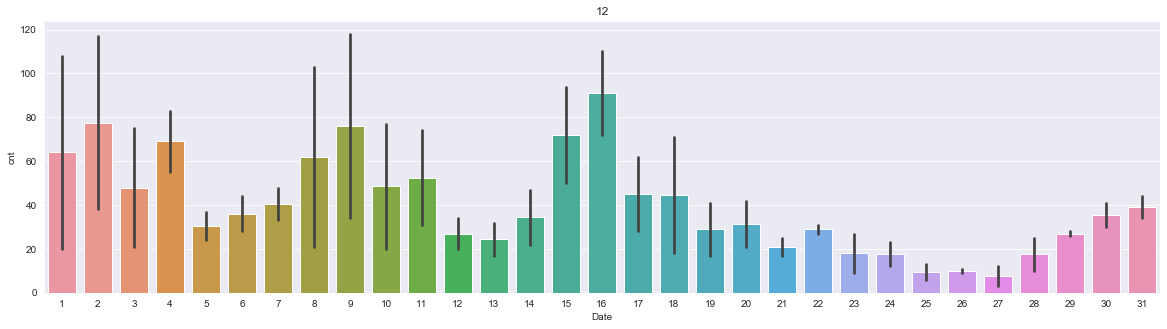

In [14]:
# Graph to show on which date of month max no. of bikes are being shared.....
for i in range(1,13):
    sns.set_style("darkgrid")
    plt.subplots(figsize=(20,5))
    sns.barplot(x='Date',y='cnt',data=df_fin.loc[df_fin["mnth"]==i],)
    plt.title(i)
    
# from above graph we can see that bike counts on 7/11/2012 are more than 250, let's recheck the values.....

In [15]:
# After Confirming........
df_max1=df_fin.loc[df_fin['cnt']>200]
df_max1

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date
12475,2012-06-09,2,1,6,0,0,6,0,1,0.64,0.6212,0.53,0.1045,54,152,206,9
14827,2012-09-15,3,1,9,0,0,6,0,1,0.60,0.5606,0.83,0.1045,38,169,207,15
15499,2012-10-13,4,1,10,0,0,6,0,1,0.36,0.3636,0.57,0.0896,31,218,249,13
16063,2012-11-07,4,1,11,0,0,3,1,2,0.30,0.2879,0.56,0.2836,49,234,283,7


In [16]:
#Dropping less useful values....
df=df.drop(['Date'],axis=1)
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


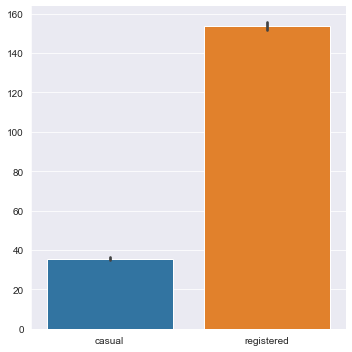

In [18]:
#check highest count for registered & casual
sns.catplot(data=df[['casual','registered']],kind="bar")

####  Conclusion is that :                                    
On November 7, 2012 maximum no. of bikes were took on rent. The count is 283

In [19]:
# Function to Count number of Bikes Took on Rent for different Features given in the dataset....
def graph(i):
    sns.set_style("darkgrid")   
    plt.subplots( figsize=(10,5))
    sns.barplot(x=i,y='cnt',data=df,hue=i,)
    plt.legend()
    plt.tight_layout()

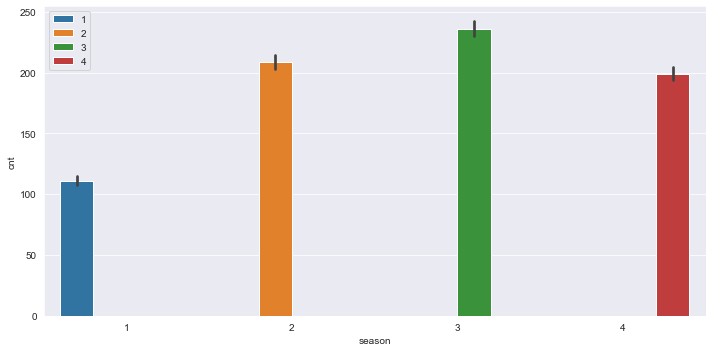

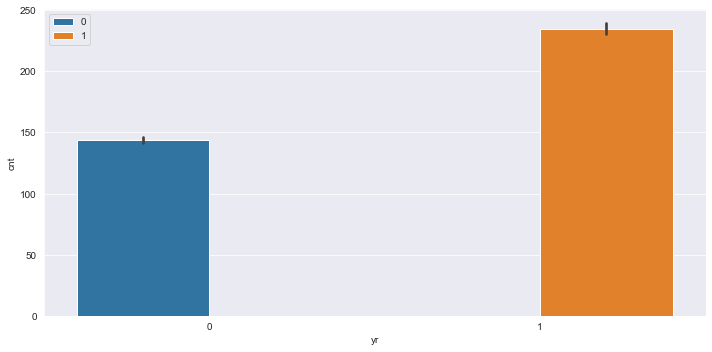

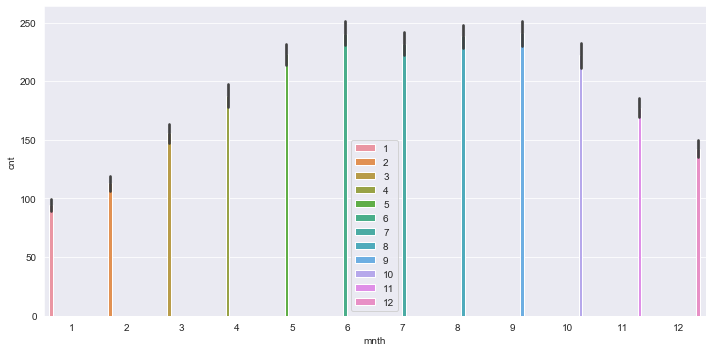

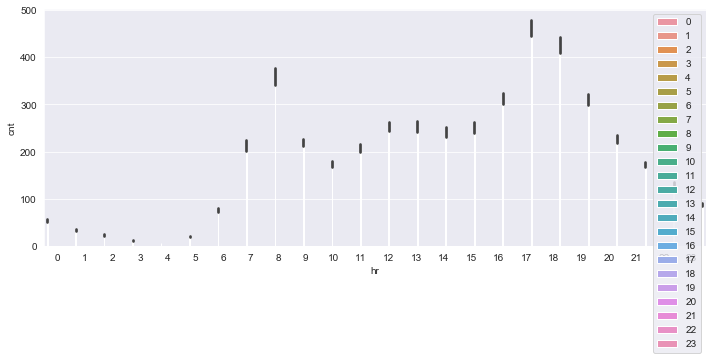

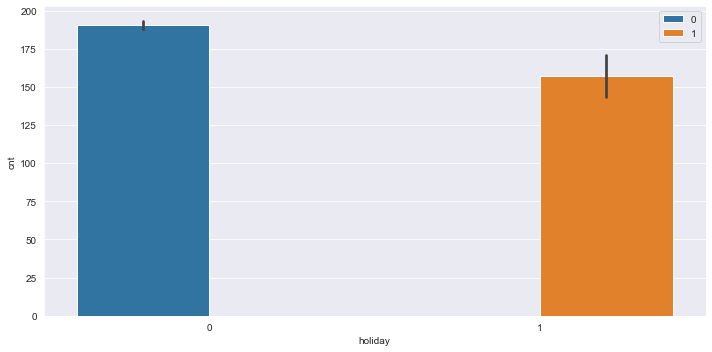

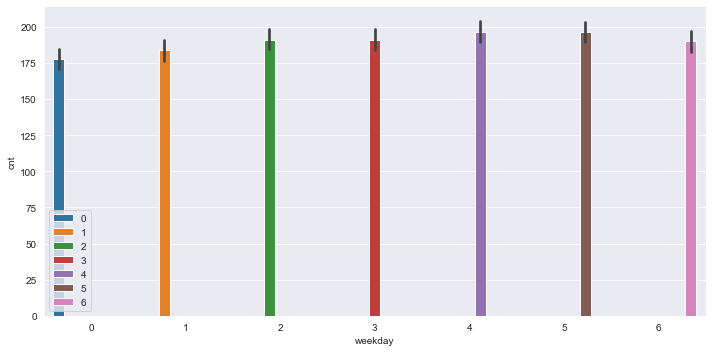

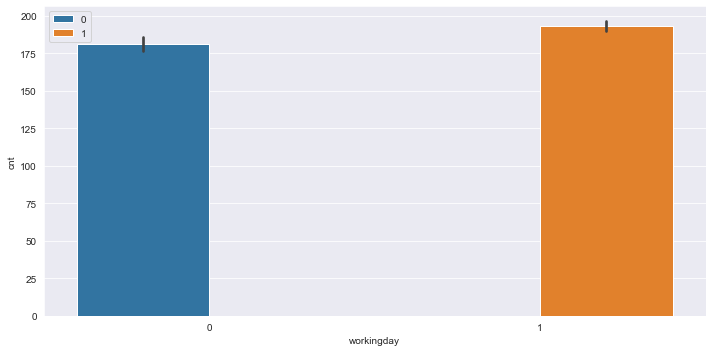

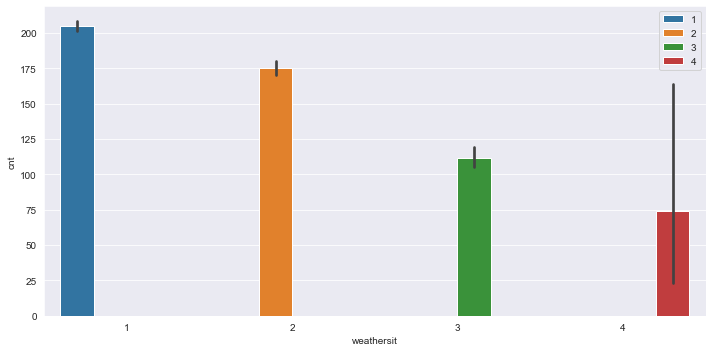

In [20]:
#selecting each columns using for loop
for i in df.drop(['dteday','windspeed','atemp','registered','casual','temp','atemp','hum','cnt',],axis=1).columns.values:
    graph(i)
#season : season (1:winter, 2:spring, 3:summer, 4:fall)
#yr : year (0: 2011, 1:2012)
#mnth : month ( 1 to 12)
#holiday : wheather day is holiday or not.
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                                    
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                                 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds                               
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

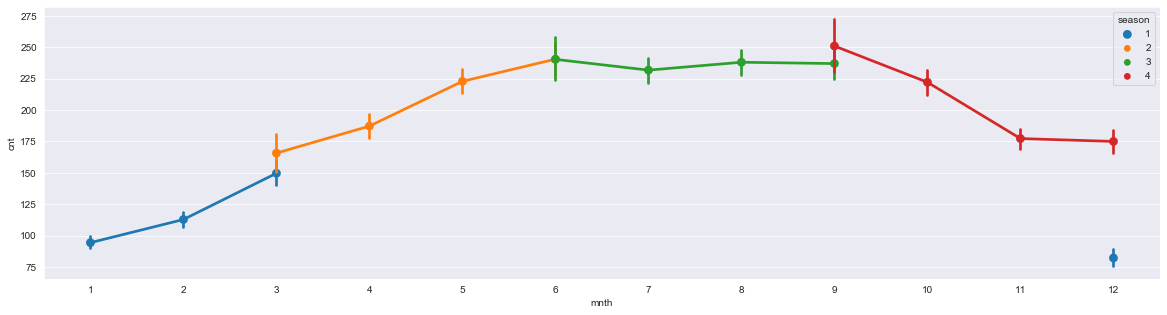

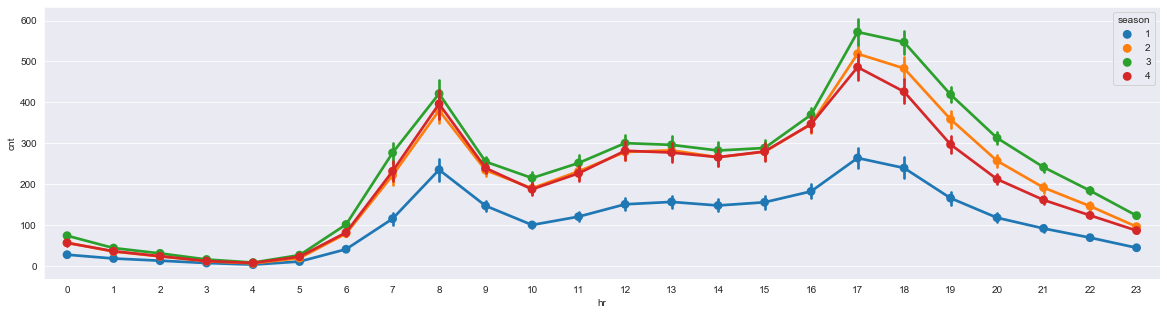

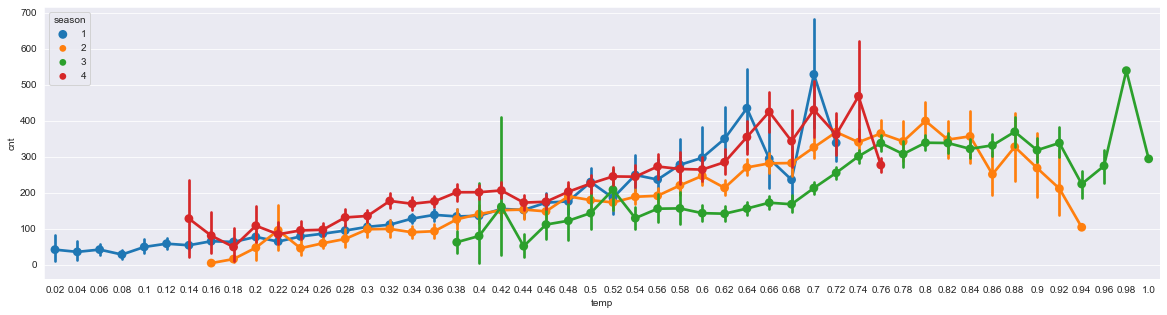

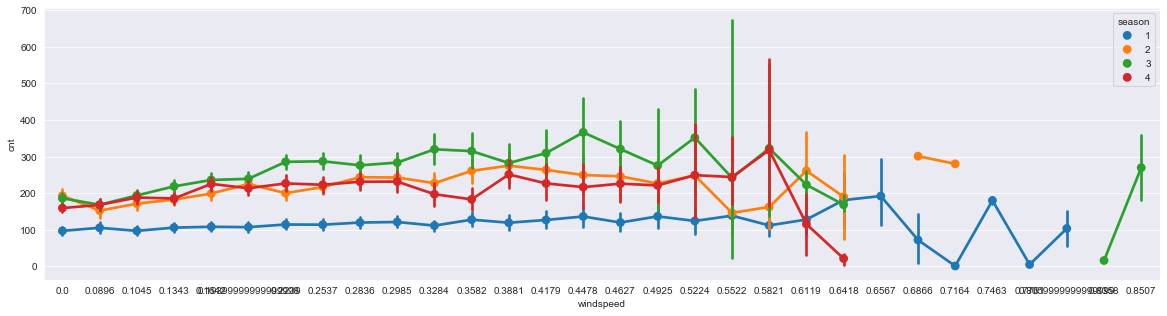

In [21]:
# for loop to plot relationships between some features (temp,hr,winspeed) and target.......
for i in df.drop(['dteday','registered','workingday','season','yr','weekday','weathersit','holiday','casual','atemp','hum','cnt',],axis=1).columns.values:
    plt.figure(figsize=(20,5))
    sns.pointplot(x=i,y="cnt",hue="season",data=df)
    plt.show()

### Conclusion from the above graphs:                                                                                 
1) In third season(i.e Summer season) no. of bikes hired are more than any other season, and in Season 1(winter) bikes hired      are much less.                                                                              
2) In 2012 no. of rented bikes are way more than in 2011.(looks like this scheme is getting popular).             
3) In the Month June, August and September bike sharing process is on the peek.                              
4) So, we see that during peak hours(8 a.m) and (5 to 6 p.m) no. of bikes shared are high than the rest of the day.           
5) Also, at 7 a.m, (9 a.m to 4 p.m) and ( 7 p.m to 8 p.m) Bikes rented are also more but less than the counts at peak hours.   
6) During holidays people prefer less bike sharing.                                                                           
7) During weekdays on an average people use bike sharing too much, and during weekends the no. is little bit low(Not a massive    difference).                                                                     
8) People prefer bike rides when the weather is:  Clear, Few clouds, Partly cloudy, Partly cloudy.                    
9) People try to avoid except in emergency whenthe weather is: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.   
10) As temp. is incresing people prefer bike sharing.
11) High windspeed means less bike rent happen.              

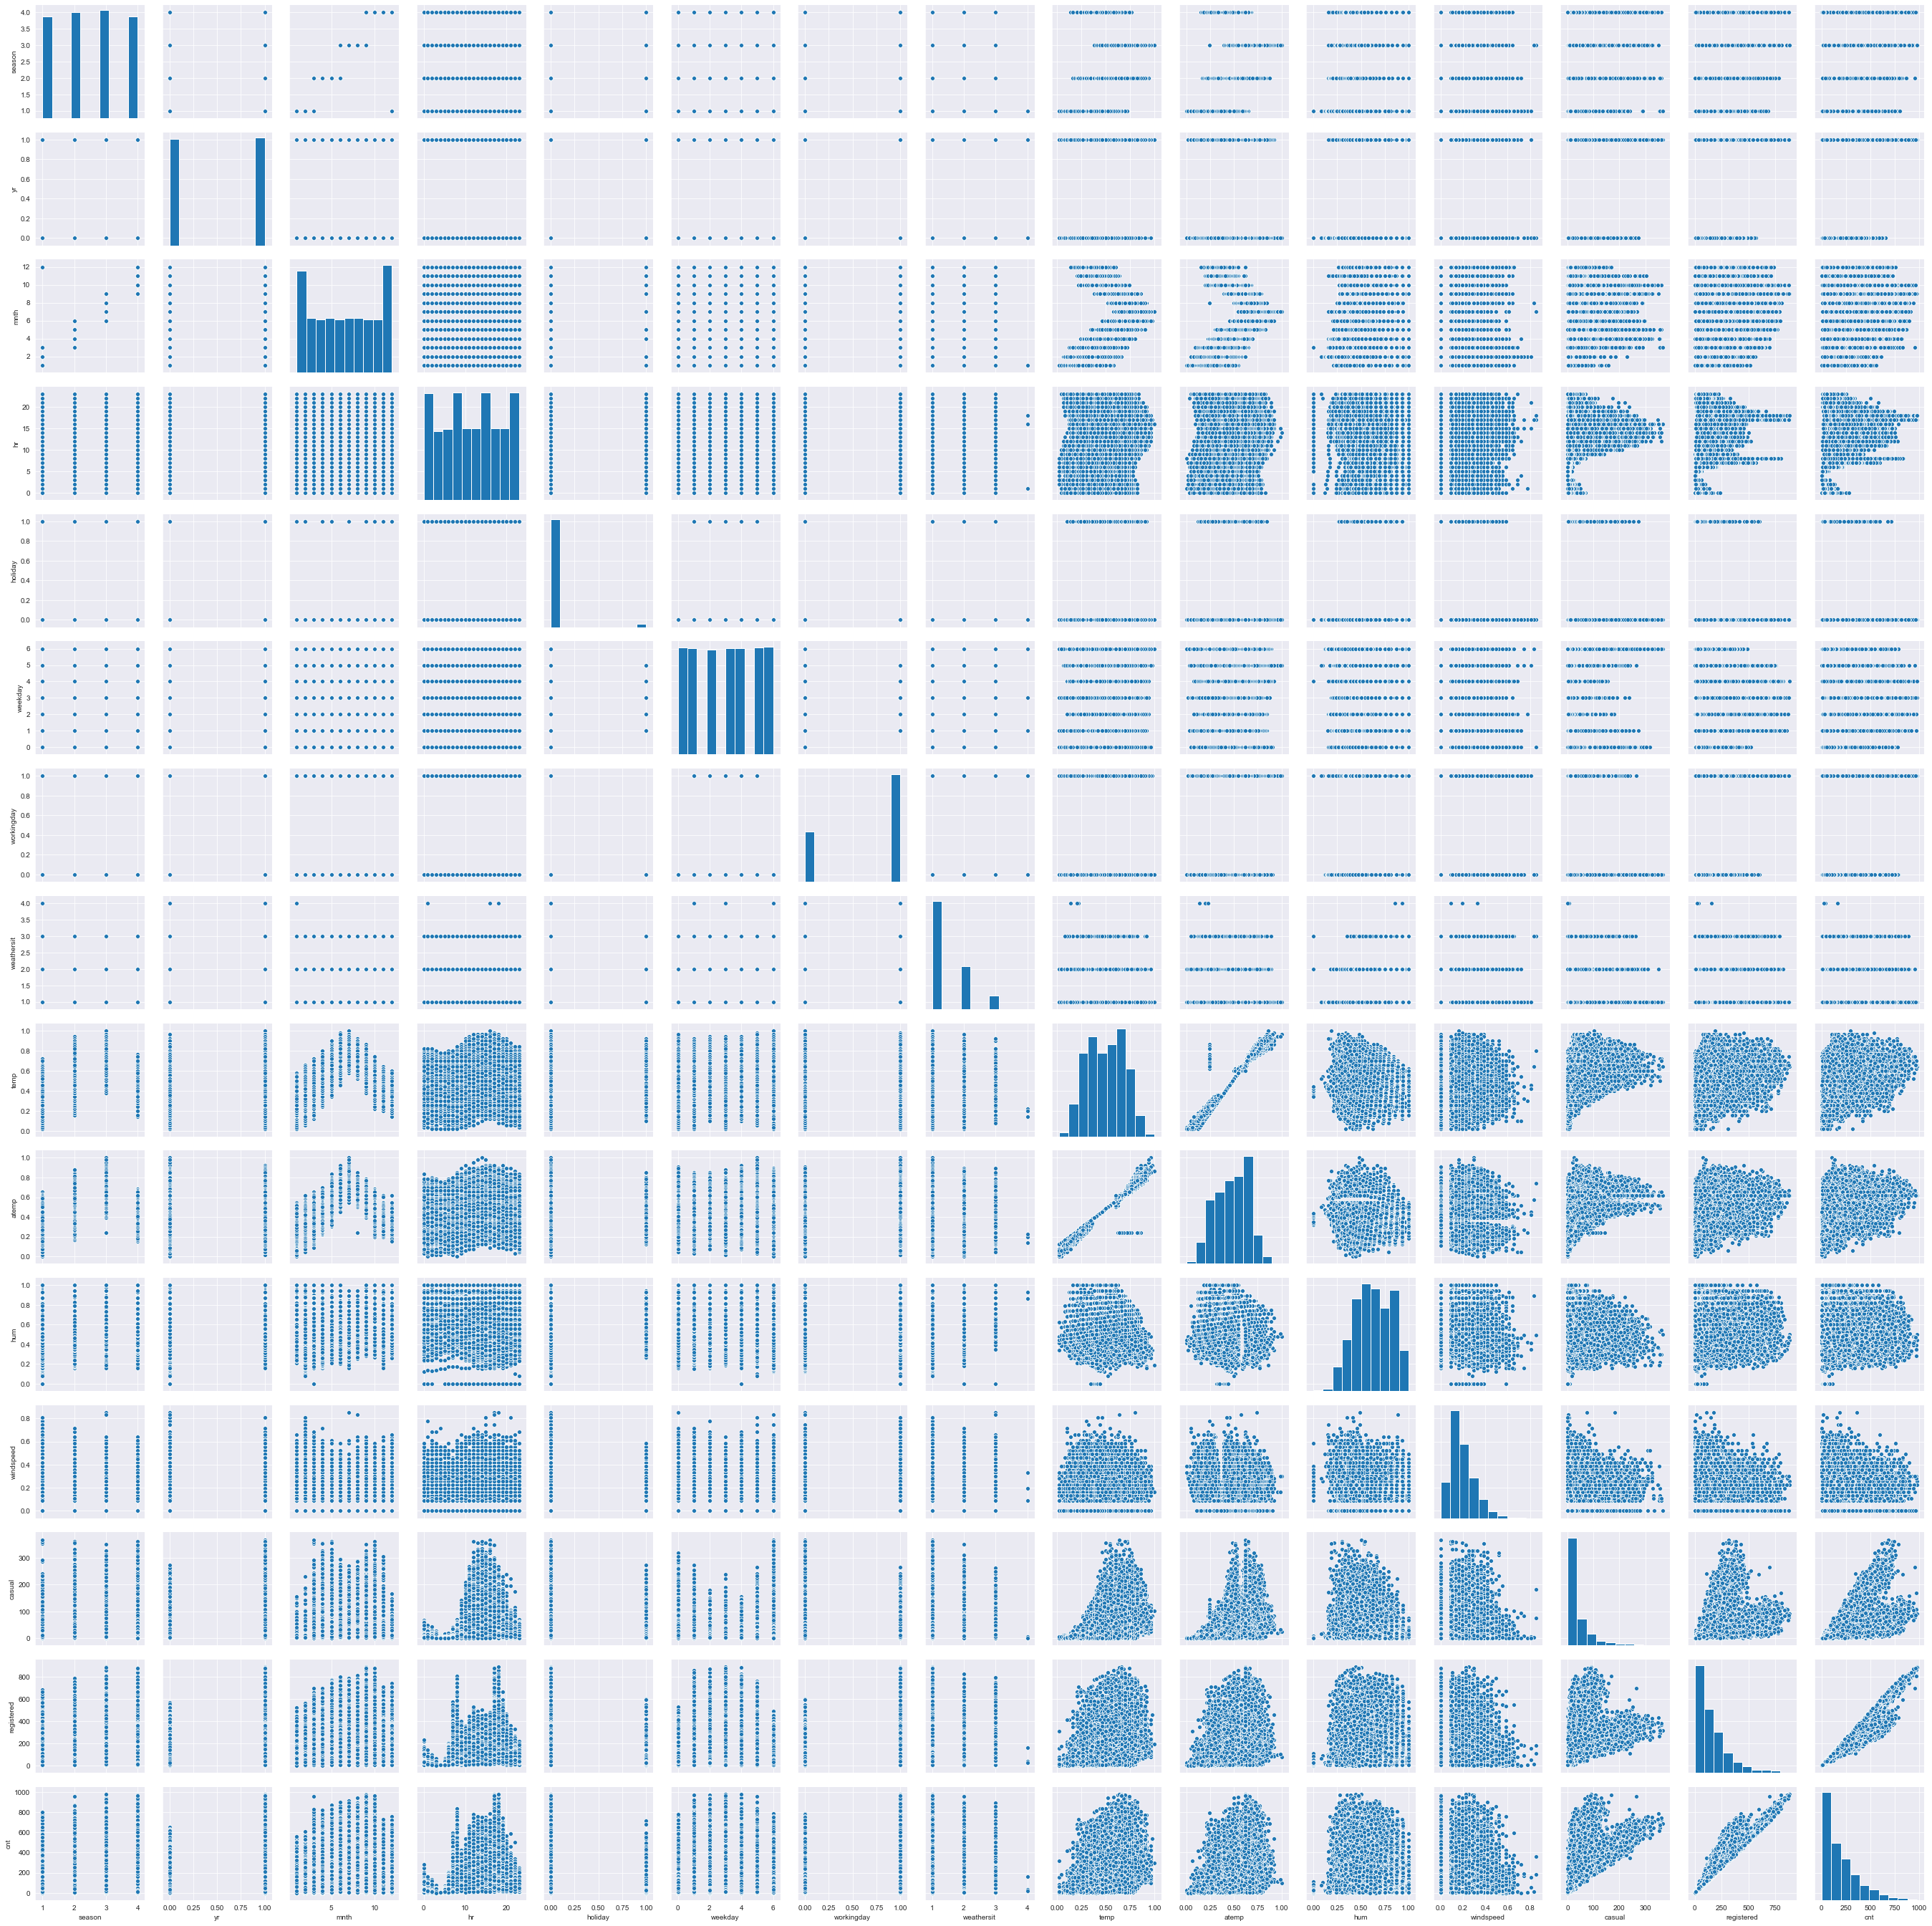

In [22]:
# Plotting the pairplot to analyze correlation between fields
sns.pairplot(df,kind='scatter')

In [23]:
# Checking the correlation
corr=df.corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(2)
# children are having very weak correlation with the target value.

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1,-0.011,0.83,-0.0061,-0.0096,-0.0023,0.014,-0.015,0.31,0.32,0.15,-0.15,0.12,0.17,0.18
yr,-0.011,1,-0.01,-0.0039,0.0067,-0.0045,-0.0022,-0.019,0.041,0.039,-0.084,-0.0087,0.14,0.25,0.25
mnth,0.83,-0.01,1,-0.0058,0.018,0.01,-0.0035,0.0054,0.2,0.21,0.16,-0.14,0.068,0.12,0.12
hr,-0.0061,-0.0039,-0.0058,1,0.00048,-0.0035,0.0023,-0.02,0.14,0.13,-0.28,0.14,0.3,0.37,0.39
holiday,-0.0096,0.0067,0.018,0.00048,1,-0.1,-0.25,-0.017,-0.027,-0.031,-0.011,0.004,0.032,-0.047,-0.031
weekday,-0.0023,-0.0045,0.01,-0.0035,-0.1,1,0.036,0.0033,-0.0018,-0.0088,-0.037,0.012,0.033,0.022,0.027
workingday,0.014,-0.0022,-0.0035,0.0023,-0.25,0.036,1,0.045,0.055,0.055,0.016,-0.012,-0.3,0.13,0.03
weathersit,-0.015,-0.019,0.0054,-0.02,-0.017,0.0033,0.045,1,-0.1,-0.11,0.42,0.026,-0.15,-0.12,-0.14
temp,0.31,0.041,0.2,0.14,-0.027,-0.0018,0.055,-0.1,1,0.99,-0.07,-0.023,0.46,0.34,0.4
atemp,0.32,0.039,0.21,0.13,-0.031,-0.0088,0.055,-0.11,0.99,1,-0.052,-0.062,0.45,0.33,0.4


(15.0, 0.0)

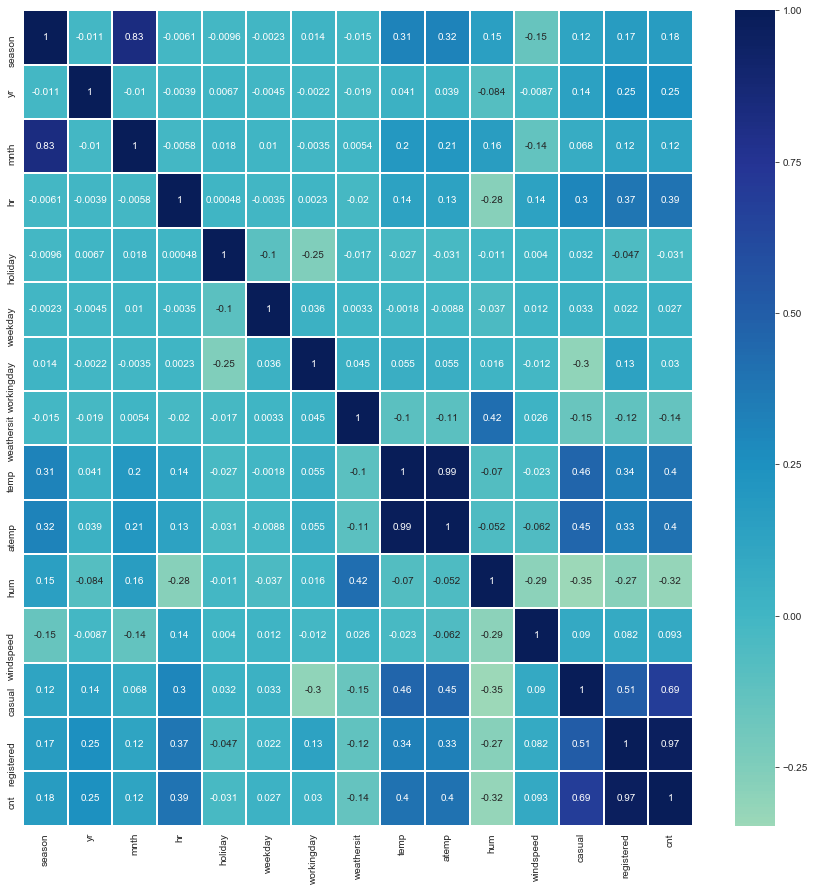

In [24]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [25]:
# checking the skewness
df.skew()

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

In [26]:
# dropping dteday as it is irrelevant for our further evaluation......
df_1=df.drop(['dteday',],axis=1)
df_1

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [27]:
# Removing Skewness
for i in df_1.columns:
    if df_1.skew().loc[i]>0.55:
        df_1[i]=np.log1p(df_1[i])

In [28]:
# checking skewness again
df_1.skew()

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    0.996837
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.263926
casual       -0.230087
registered   -0.819644
cnt          -0.818180
dtype: float64

In [29]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df_1))
print(df_1.shape)
df_new=df_1.loc[(z<3).all(axis=1)]
print(df_new.shape)

(17379, 15)
(16768, 15)


season           AxesSubplot(0.125,0.772143;0.227941x0.107857)
yr            AxesSubplot(0.398529,0.772143;0.227941x0.107857)
mnth          AxesSubplot(0.672059,0.772143;0.227941x0.107857)
hr               AxesSubplot(0.125,0.642714;0.227941x0.107857)
holiday       AxesSubplot(0.398529,0.642714;0.227941x0.107857)
weekday       AxesSubplot(0.672059,0.642714;0.227941x0.107857)
workingday       AxesSubplot(0.125,0.513286;0.227941x0.107857)
weathersit    AxesSubplot(0.398529,0.513286;0.227941x0.107857)
temp          AxesSubplot(0.672059,0.513286;0.227941x0.107857)
atemp            AxesSubplot(0.125,0.383857;0.227941x0.107857)
hum           AxesSubplot(0.398529,0.383857;0.227941x0.107857)
windspeed     AxesSubplot(0.672059,0.383857;0.227941x0.107857)
casual           AxesSubplot(0.125,0.254429;0.227941x0.107857)
registered    AxesSubplot(0.398529,0.254429;0.227941x0.107857)
cnt           AxesSubplot(0.672059,0.254429;0.227941x0.107857)
dtype: object

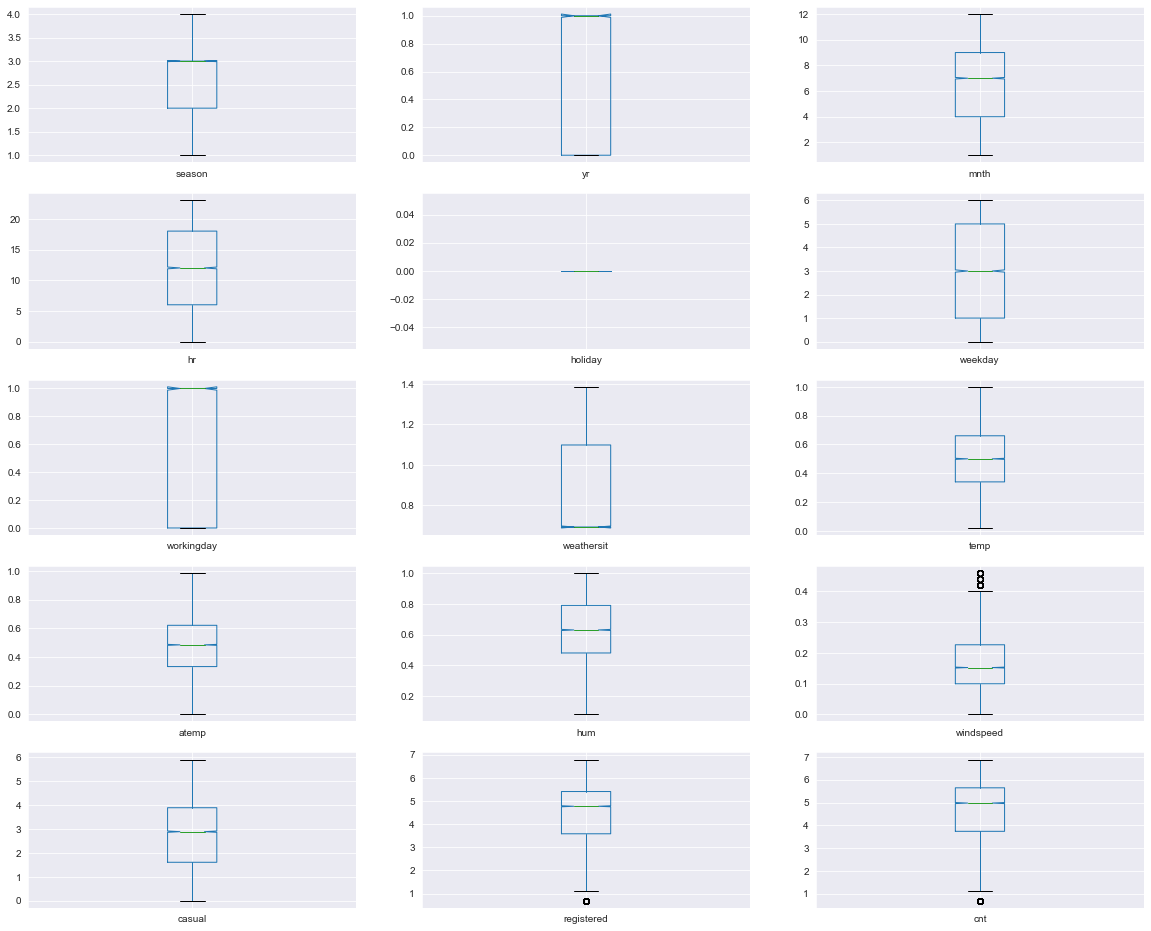

In [30]:
# Plotting the boxplot in order to check few statistical values and outliers
df_new.plot(kind='box', subplots=True, layout=(6,3),figsize=(20,20),grid=True,notch=True)
# I've plotted boxplot again to see whether the outliers removed or not and it is inferred that lots of outliers are removed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002806CB17688>,
      dtype=object)

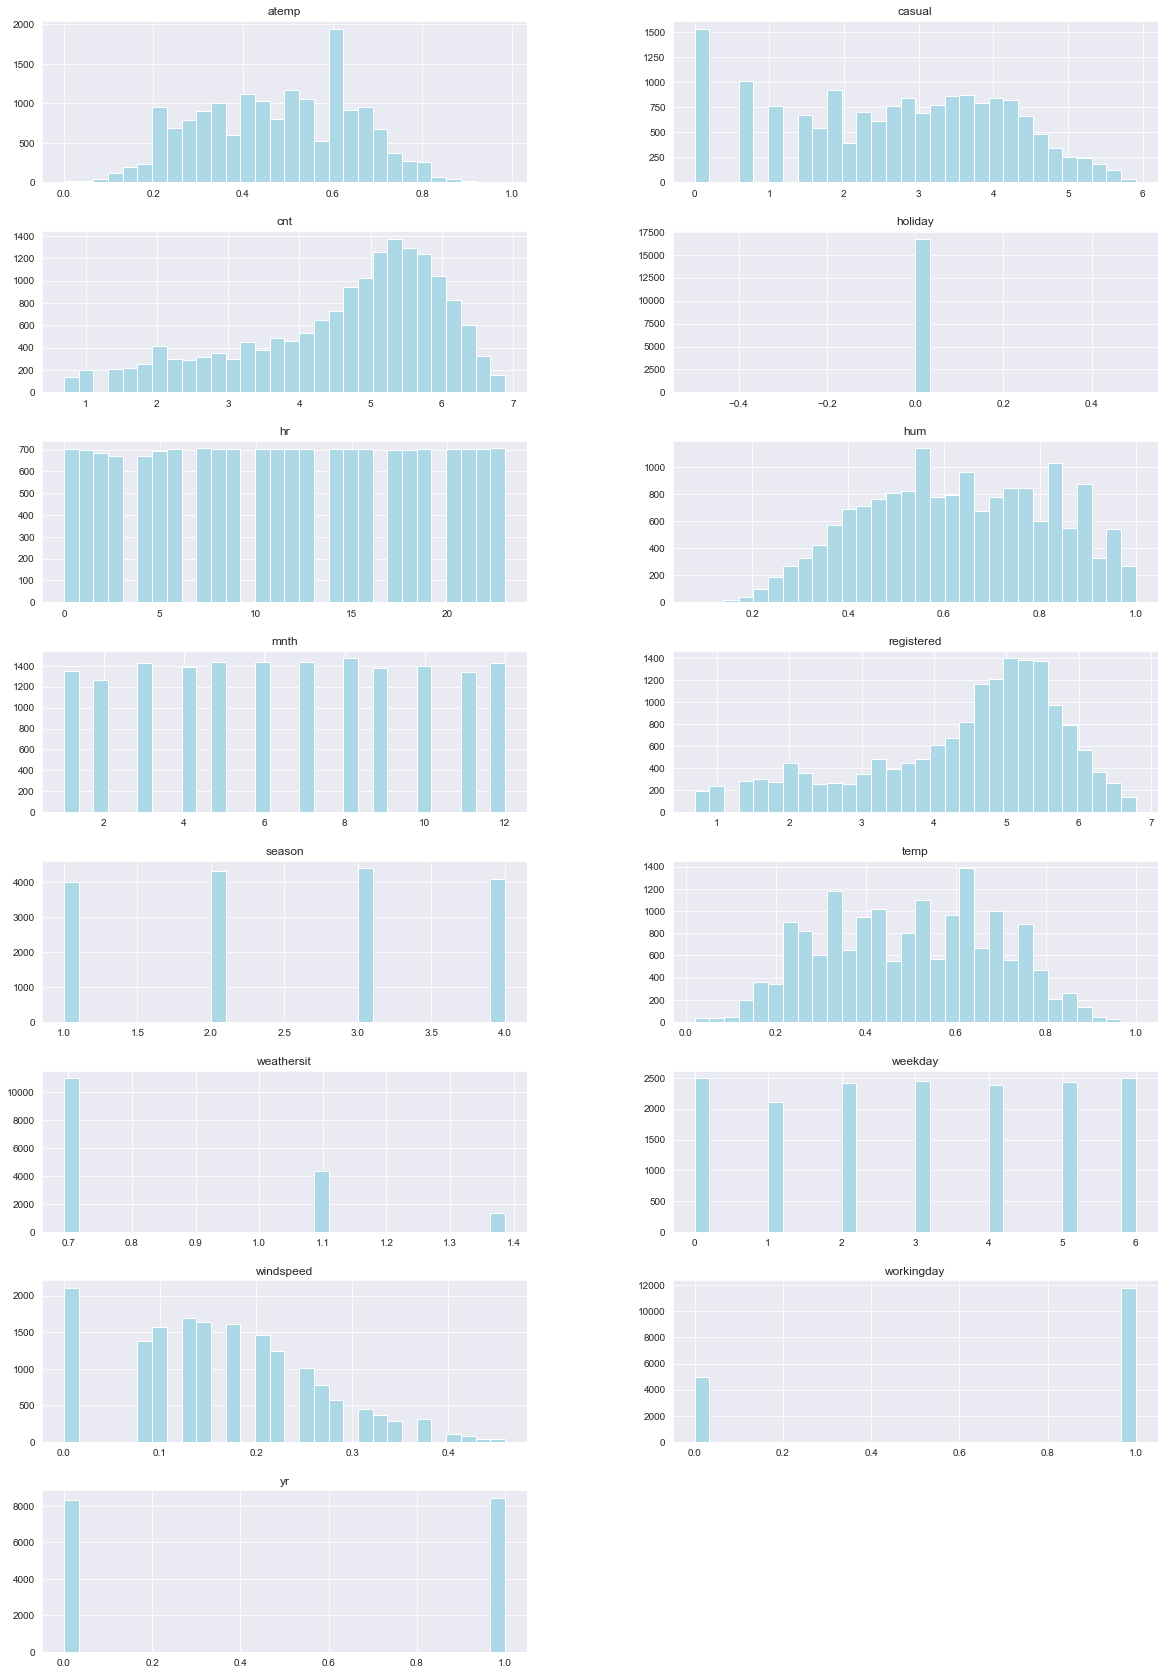

In [31]:
#Checking the Distribution using the histogram plot.
df_new.hist(figsize=(20,30),grid=True,layout=(8,2),bins=30,color='lightblue')

# Also distribution is also improved.

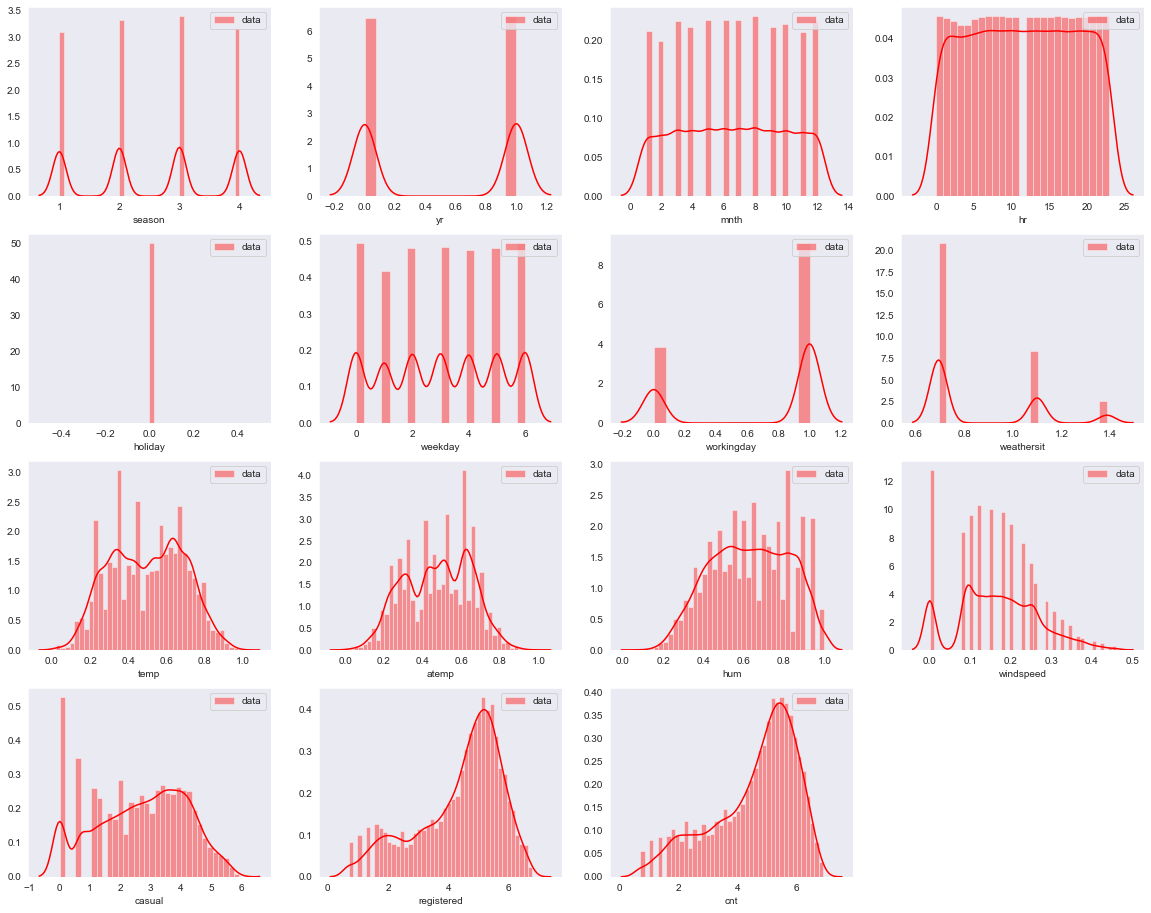

In [36]:
# Checking the Normal distribution of the dataset.
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_new[col],color='red',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.


In [37]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['cnt',],axis=1)
x1
print(x1.shape)

(16768, 14)


In [38]:
# Setting up the Target value in variable y.
y=df_new['cnt']
y.shape

(16768,)

In [39]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,-1.369964,-1.006222,-1.620676,-1.669466,0.0,1.473556,-1.537649,-0.688347,-1.346338,-1.106524,0.944877,-1.690802,-0.888529,-1.262273
1,-1.369964,-1.006222,-1.620676,-1.524857,0.0,1.473556,-1.537649,-0.688347,-1.450521,-1.195354,0.892728,-1.690802,-0.343156,-0.645828
2,-1.369964,-1.006222,-1.620676,-1.380247,0.0,1.473556,-1.537649,-0.688347,-1.450521,-1.195354,0.892728,-1.690802,-0.615843,-0.763950
3,-1.369964,-1.006222,-1.620676,-1.235638,0.0,1.473556,-1.537649,-0.688347,-1.346338,-1.106524,0.631980,-1.690802,-0.888529,-1.435651
4,-1.369964,-1.006222,-1.620676,-1.091029,0.0,1.473556,-1.537649,-0.688347,-1.346338,-1.106524,0.631980,-1.690802,-1.820851,-2.661242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,-1.369964,0.993817,1.596051,1.078110,0.0,-1.013719,0.650343,1.030720,-1.242154,-1.283599,-0.150263,-0.156193,-0.149682,0.213176
16764,-1.369964,0.993817,1.596051,1.222719,0.0,-1.013719,0.650343,1.030720,-1.242154,-1.283599,-0.150263,-0.156193,-0.343156,0.008548
16765,-1.369964,0.993817,1.596051,1.367328,0.0,-1.013719,0.650343,-0.688347,-1.242154,-1.283599,-0.150263,-0.156193,-0.422368,0.025873
16766,-1.369964,0.993817,1.596051,1.511938,0.0,-1.013719,0.650343,-0.688347,-1.242154,-1.195354,-0.358861,-0.418819,-0.046011,-0.361627


# Conclusion:  

1) In third season(i.e Summer season) no. of bikes hired are more than any other season, and in Season 1(winter) bikes hired are much less.                                                                    
2) In 2012 no. of rented bikes are way more than in 2011.(looks like this scheme is getting popular).             
3) In the Month June, August and September bike sharing process is on the peek.                              
4) So, we see that during peak hours(8 a.m) and (5 to 6 p.m) no. of bikes shared are high than the rest of the day.   
5) Also, at 7 a.m, (9 a.m to 4 p.m) and ( 7 p.m to 8 p.m) Bikes rented are also more but less than the counts at peak hours.  
6) During holidays people prefer less bike sharing.                                           
7) During weekdays on an average people use bike sharing too much, and during weekends the no. is little bit low(Not a massive difference).                                                                                          
8) People prefer bike rides when the weather is: Clear, Few clouds, Partly cloudy, Partly cloudy.                       
9) People try to avoid except in emergency whenthe weather is: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog. 
10) on November, 7, 2012 maximum no. of bikes were took on rent i.e 283.               
11) As temp. is incresing people prefer bike sharing.                 
12) High windspeed means less bike rent happen.                   
                      